# Latar Belakang

AWS atau Amazone Web Services merupakan sebuah perusahaaan SaaS (Software as a service) yang melayani dalam bentuk *Cloud Computing* atau Komputisi awan. AWS sering digunakan untuk analitik, penyimpanan data, layanan aplikasi, jaringan, dan berbagai produk lainnya. Dalam kasus ini, AWS ingin mencari tahu bagaimana meningkatan *revenue* mereka. Utamanya ingin mengurangi kerugian-kerugian yang dialami. Untuk itu kita akan menganalisa bagaimana kerugian ini dapat terjadi, dan apa solusi secara bisnis untuk meningkatkan keuntungan mereka.

## Objektif utama

1. Mencari tahu apa yang membuat kerugian mereka begitu tinggi, dan ingin solusi untuk menguranginya.

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deskripsi Data

Dataset Saas Sales ini memiliki data penjualan software sales dan marketing yang dijual ke bisnis atau yang biasa disebut *Business-to-business*(B2B). dengan total 19 Kolom yaitu:
1. Row ID: ID Transaksi unik.
2. Order ID: ID Order unik.
3. Order Date: tanggal pesanan.
4. Date Key: Tanggal dirubah ke kode (10 januari 2023 -> 01/12/2023 -> 20230112).
5. Contact Name: Nama yang melakukan pesanan.
6. Country: Negara sumber pesanan.
7. City: Kota sumber pesanan.
8. Region: Wilayah sumber pesanan.
9. Subregion: Bagian wilayah sumber pesanan.
10. Customer: Nama perusahaan pemesan.
11. Customer ID: ID customer unik.
12. Industry: Industri dari perusahaan pemesan.
13. Segment: segmen perusahaan.
14. Product: produk yang di pesan.
15. License: nomor lisensi produk yang dipesan.
16. Sales: total nominal transaksi.
17. Quantity: Jumlah pesanan di transaksi.
18. Discount: Diskon yang diberikan ke transaksinya.
19. Profit: Keuntungan yang didapatkan dari transaksi.

In [3]:
df = pd.read_csv('SaaS-Sales.csv')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


# Analisis Data Eksploratif
Untuk mengetahui apa saja yang perlu dilakukan dalam pembersihan data, pengubahan data, dan analisa data, ada keperluan untuk mengeksplorasi terlebih dahulu data secara mendalam agar dapat melakukan langkah-langkah yang tepat. Dari tahap ini kita dapat mendapatkan alasan yang baik untuk setiap proses *data cleaning*, *data transformation*, dan *data analysis*.

## Analisis deskriptif

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [6]:
df.describe()[1:]

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df[df['Profit'] == -6599.978] 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
7772,7773,AMER-2022-108196,11/26/2022,20221126,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,1003,Finance,SMB,Big Ol Database,PM66ENV0DN,4499.985,5,0.7,-6599.978


In [8]:
df['Customer'].nunique()

99

In [9]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Pengecekan duplicates

In [10]:
df.duplicated().isna().sum()

0

In [11]:
df['Order ID'].duplicated().sum()

4985

In [12]:
df['License'].duplicated().sum()

0

Secara umum kita dapat mengetahui beberapa hal dari *dataset* *SaaS Sales* ini:
1. *Dataset* ini memiliki 9994 baris dan 19 kolom.
2. Tidak memiliki missing values.
3. Order ID memiliki duplicates, artinya produk-produk yang berbeda dapat dimasukan ke dalam satu pesanan.
3. Customer ID hanya ada 99 unik. artinya hanya ada 99 pelanggan yang berbeda dari 9994 baris transaksi.
4. Minimal nilai sales adalah 0.444, merupakan potensi sebuah *anomali*
5. Profit terkecil adalah -6599.978, merupakan potensi sebuah *anomali*. namun tidak jarang bagi SaaS software untuk rugi 
6. Kolom *Order Date* memiliki tipe data *object* yang seharusnya datetime

## Eksplorasi lebih lanjut

In [13]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [14]:
df['Order ID'].sort_values(ascending=True)

6288    AMER-2020-100090
6287    AMER-2020-100090
1171    AMER-2020-100279
3835    AMER-2020-100363
3836    AMER-2020-100363
              ...       
5151    EMEA-2023-169929
3315    EMEA-2023-169978
3314    EMEA-2023-169978
9828    EMEA-2023-169999
9827    EMEA-2023-169999
Name: Order ID, Length: 9994, dtype: object

In [15]:
df[df['Order ID'] == 'AMER-2020-100090']

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
6287,6288,AMER-2020-100090,7/8/2020,20200708,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,4BEAB9UXKH,502.488,3,0.2,-87.9354
6288,6289,AMER-2020-100090,7/8/2020,20200708,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,AVBMH39MTD,196.704,6,0.2,68.8464


In [16]:
df[df['Order ID'] == 'AMER-2020-100363']

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
3835,3836,AMER-2020-100363,4/8/2020,20200408,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,Storage,0O2MCUTMFW,2.368,2,0.2,0.8288
3836,3837,AMER-2020-100363,4/8/2020,20200408,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,Support,7ZEJI08M1P,19.008,3,0.2,6.8904


In [17]:
df[df['Order ID'] == 'EMEA-2023-169999']

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9827,9828,EMEA-2023-169999,6/20/2023,20230620,Melanie Young,United Kingdom,London,EMEA,UKIR,Daimler,1052,Transportation,Strategic,Marketing Suite - Gold,FTRN8DSZMD,129.300,2,0.0,6.4650
9828,9829,EMEA-2023-169999,6/20/2023,20230620,Melanie Young,United Kingdom,London,EMEA,UKIR,Daimler,1052,Transportation,Strategic,ContactMatcher,5JIPT0BG1B,11.568,3,0.2,3.7596


## Pengecekan konsistensi kolom kategorikal

In [18]:
df['Country'].sort_values(ascending=True).unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Taiwan',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [19]:
df['City'].sort_values(ascending=True).unique()

array(['Abu Dhabi', 'Adelaide', 'Aichi', 'Alexandria', 'Alicante',
       'Amsterdam', 'Anaheim', 'Ankara', 'Antofagasta', 'Antwerp',
       'Arlington', 'Athens', 'Atlanta', 'Auckland', 'Aurora', 'Austin',
       'Baltimore', 'Bandung', 'Bangalore', 'Barcelona', 'Bari',
       'Beijing', 'Belfast', 'Belo Horizonte', 'Berlin', 'Birmingham',
       'Bogotá', 'Bologna', 'Brasília', 'Brescia', 'Brighton', 'Brisbane',
       'Bristol', 'Brno', 'Brussels', 'Buenos Aires', 'Buffalo',
       'Burlington', 'Bursa', 'Busan', 'Cabo San Lucas', 'Cairo',
       'Calgary', 'Cali', 'Canberra', 'Cancun', 'Cape Town', 'Cardiff',
       'Catania', 'Charlotte', 'Chengdu', 'Chennai', 'Chiba', 'Chicago',
       'Cleveland', 'Clinton', 'Cologne', 'Columbia', 'Columbus',
       'Copenhagen', 'Cork', 'Córdoba', 'Daegu', 'Dallas', 'Davao City',
       'Delhi', 'Denver', 'Detroit', 'Dhahran', 'Doha', 'Donetsk',
       'Dresden', 'Dubai', 'Dublin', 'Edinburgh', 'Espoo', 'Everett',
       'Florence', 'Fort Worth

In [20]:
df['Region'].sort_values(ascending=True).unique()

array(['AMER', 'APJ', 'EMEA'], dtype=object)

In [21]:
df['Subregion'].sort_values(ascending=True).unique()

array(['ANZ', 'APAC', 'EU', 'EU-EAST', 'EU-WEST', 'IND', 'JAPN', 'LATAM',
       'MEA', 'NAMER', 'NOR', 'UKIR'], dtype=object)

In [22]:
df['Industry'].sort_values(ascending=True).unique()

array(['Communications', 'Consumer Products', 'Energy', 'Finance',
       'Healthcare', 'Manufacturing', 'Misc', 'Retail', 'Tech',
       'Transportation'], dtype=object)

In [23]:
df['Segment'].sort_values(ascending=True).unique()

array(['Enterprise', 'SMB', 'Strategic'], dtype=object)

In [24]:
df['Product'].sort_values(ascending=True).unique()

array(['Alchemy', 'Big Ol Database', 'ChatBot Plugin', 'ContactMatcher',
       'Data Smasher', 'FinanceHub', 'Marketing Suite',
       'Marketing Suite - Gold', 'OneView', 'SaaS Connector Pack',
       'SaaS Connector Pack - Gold', 'Site Analytics', 'Storage',
       'Support'], dtype=object)

# Pembersihan Data (Data cleaning)

## Perubahan data (*Data transformation*)
Dikarenakan tipe data *Order Date* adalah object, kita merubah data tersebut menjadi datetime agar nanti bisa melakukan analisis berdasarkan *Orde Date*

In [25]:
#Menyimpan data original dengan menggunakan .copy()
df_tf= df.copy()

In [26]:
df_tf['Order Date'] = pd.to_datetime(df_tf['Order Date'])

In [27]:
df_tf['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


## Kesimpulan *data cleaning*

1. Tidak ada duplicates yang merupakan kesalahan data atau diluar logika bisnis. 
2. Tidak ada data *null* dalam dataset
3. Data kategorikal tidak ada ketidakkonsistenan 
4. Hanya kolom *Order Date* yang perlu perubahan tipe data

# Data Analysis

In [28]:
df_tf.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


Untuk memulai analisa data, perlu diingat bahwa tujuan analisa bukan untuk mencari produk/negara/pelanggan yang paling menguntungkan. Namun untuk mencari tahu hal-hal terkait kerugian, seperti:
1. Jumlah kerugian total.
2. Jumlah kerugian berdasarkan negara/produk/pelanggan/segmentasi lainnya.
3. Mencari tahu penyebab kerugian.
4. Mencari solusi mengurangi kerugian.

## Jumlah Kerugian total

In [29]:
df_tf[df_tf['Profit'] < 0]['Profit'].sum()

-156131.2857

Total kerugian adalah 156131$ (diasumsikan menggunakan dolar karena transaksi internasional)

## Jumlah rugi berdasarkan negara

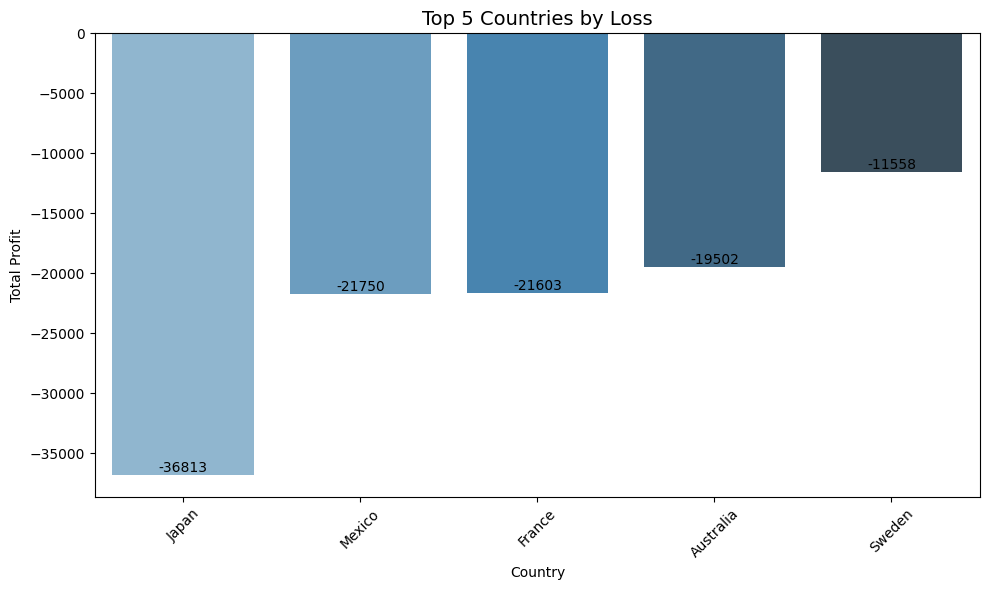

In [30]:
df_loss = df_tf[df_tf['Profit'] < 0]

top_5 = df_loss.groupby('Country').agg({
    'Order ID':'count',
    'Profit':'sum'
}).sort_values(by='Profit', ascending=True).head().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5, x='Country', y='Profit', palette='Blues_d')

# Add value labels on top of bars
for index, row in top_5.iterrows():
    plt.text(index, row['Profit'], f"{row['Profit']:.0f}", ha='center', va='bottom')

plt.title('Top 5 Countries by Loss', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Jepang merupakan negara dimana kerugian tertinggi terjadi. bahkan jauh jika dibandingkan dengan negara dengan kerugian tertinggi kedua (Mexico). Pertanyaan yang muncul adalah:
1. Kenapa kerugian tertinggi terjadi di Jepang?

## Top products

In [31]:
# Prepare the data
top_5_prod = df_loss.groupby('Product').agg({
    'Order ID': 'count',
    'Profit': 'sum'
}).sort_values(by='Profit', ascending=True).head(5).reset_index()



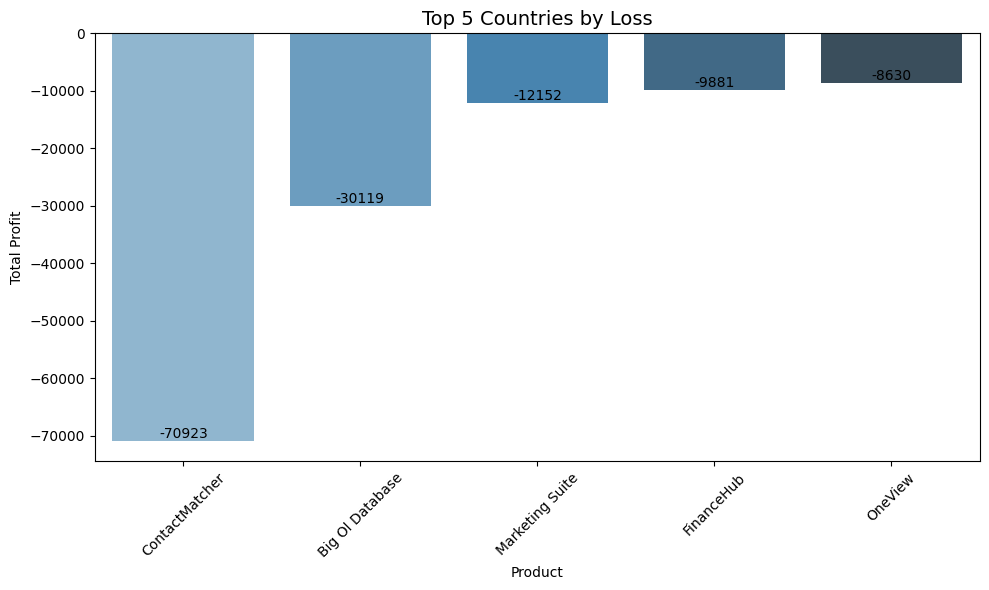

In [32]:
top_5 = df_loss.groupby('Product').agg({
    'Order ID':'count',
    'Profit':'sum'
}).sort_values(by='Profit', ascending=True).head().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5, x='Product', y='Profit', palette='Blues_d')

# Add value labels on top of bars
for index, row in top_5.iterrows():
    plt.text(index, row['Profit'], f"{row['Profit']:.0f}", ha='center', va='bottom')

plt.title('Top 5 Countries by Loss', fontsize=14)
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Produk dengan kerugian tertinggi adalah Contactmatcher dengan total kerugian 70923$. ContactMatcher adalah produk yang berhubungan dengan pengalaman pelanggan. Produk ini membantu perusahaan untuk mencari tahu motivasi tertinggi, produk terbaik, bahkan sampai karakteristik agen yang cocok dengan customer tersebut. Sekilas produk ini bagus, namun perlu dipertanyakan apa penyebab utama kerugian ini.

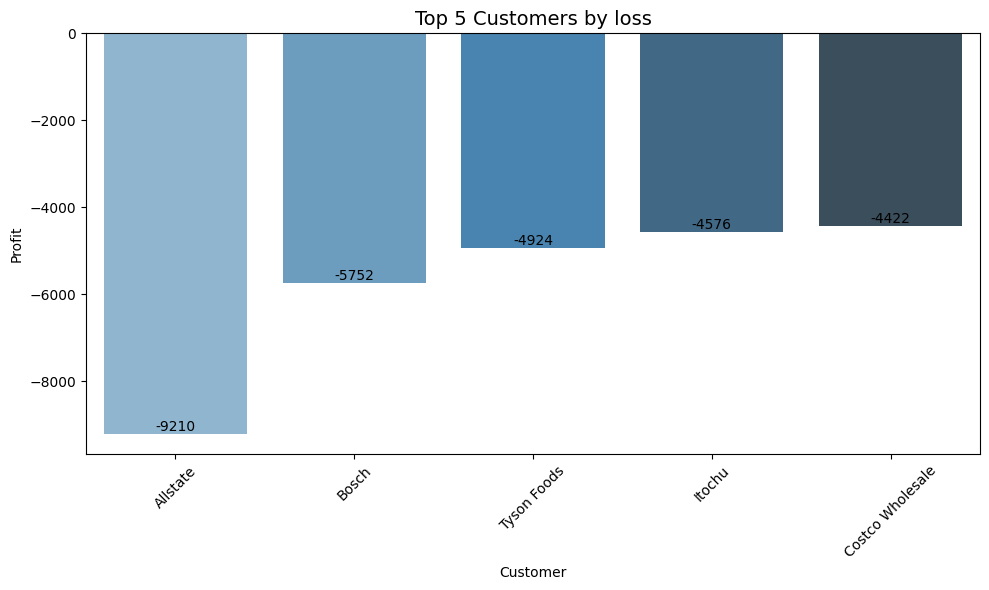

In [33]:
top_5_cust = df_loss.groupby('Customer').agg({
    'Profit':'sum'
}).sort_values(by='Profit', ascending = True).head().reset_index()
top_5_cust
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_cust, x='Customer', y='Profit', palette='Blues_d')

# Add value labels on top of bars
for index, row in top_5_cust.iterrows():
    plt.text(index, row['Profit'], f"{row['Profit']:.0f}", ha='center', va='bottom')

plt.title('Top 5 Customers by loss', fontsize=14)
plt.xlabel('Customer')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Catatan: Allstate adalah perusahaan asuransi yang berdiri di Amerika Serikat.

# Mencari alasan utama kerugian secara umum

secara umum, kerugian dapat terjadi jika perusahaan menjual produk dengan harga yang sangat murah. Penjualan produk dengan sangat murah dapat terjadi jika perusahaan tersebut tidak dapat menjual produknya di harga normal sehingga memerlukan diskon atau potongan harga untuk menarik konsumen. Biasanya potongan harga diberikan dengan berbagai alasan seperti untuk pembelian pertama, untuk konsumen yang setia, atau karena tidak laku. Untuk itu kita akan menganalisa dari aspek diskon. Seberapa besar pengaruh diskon terhadap kerugian.

In [34]:
df_loss.sort_values(by='Profit').head(10)[['Discount','Profit']]

,Discount,Profit
7772,0.7,-6599.9780
683,0.5,-3839.9904
9774,0.8,-3701.8928
3011,0.7,-3399.9800
4991,0.8,-2929.4845
3151,0.7,-2639.9912
5310,0.8,-2287.7820
9639,0.4,-1862.3124
1199,0.8,-1850.9464
2697,0.5,-1811.0784


In [35]:
top_10_loss = df_loss.sort_values(by='Profit').head(10)[['Discount','Profit']]
top_10_loss.Discount.mean()

0.67

Jika dilihat berdasarkan 10 kerugian terbesar berdasarkan transaksi, dapat dilihat bahwa kebanyakan diskon atau potongan harga diatas 40% dengan rata-rata potongan sebesar 67% untuk 10 kerugian terbesar. Dapat dilihat bahwa ada korelasi antara potongan harga dan kerugian.

In [36]:
df_loss[['Sales','Discount','Quantity','Profit']].corr()[3:]

,Sales,Discount,Quantity,Profit
Profit,-0.544418,-0.081273,-0.171625,1.0


mari kita gunakan scatterplot untuk melihat korelasi dan persebaran data

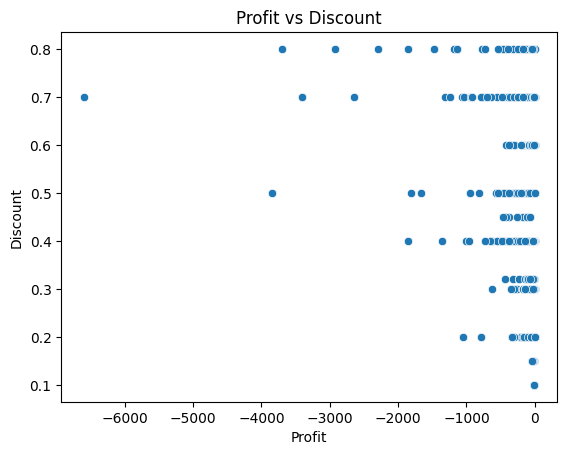

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Scatter plot between sales and profit
sns.scatterplot(data=df_loss, x='Profit', y='Discount')
plt.title('Profit vs Discount')
plt.xlabel('Profit')
plt.ylabel('Discount')
plt.show()

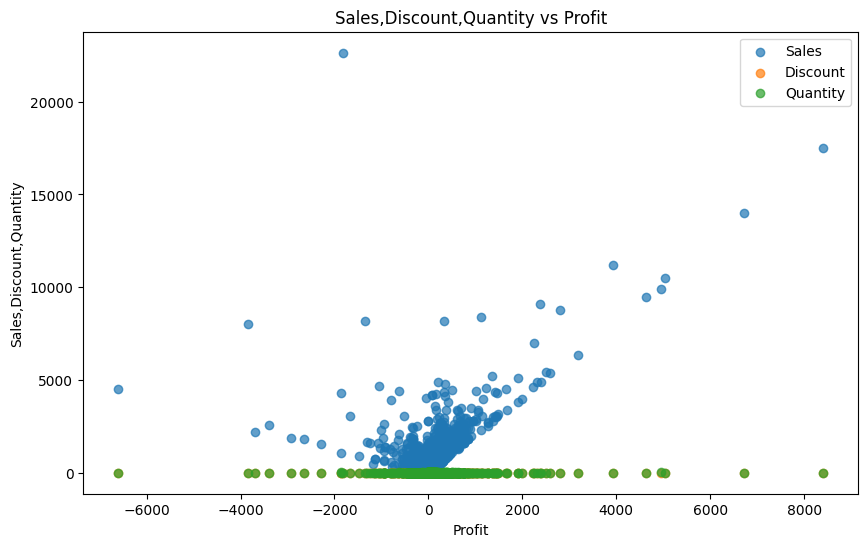

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for each X variable
plt.scatter(df['Profit'], df['Sales'], label='Sales', alpha=0.7)
plt.scatter(df['Profit'], df['Discount'], label='Discount', alpha=0.7)
plt.scatter(df['Profit'], df['Quantity'], label='Quantity', alpha=0.7)

plt.xlabel('Profit')
plt.ylabel('Sales,Discount,Quantity')
plt.title('Sales,Discount,Quantity vs Profit')
plt.legend()
plt.show()

Jika dilihat berdasarkan korelasi, dari korelasi negatif terbesar:
1. Sales
2. Quantity
3. Discount

Secara data memang benar kalau sales alias harga jual pasti berpengaruh terhadap kerugian. juga kuantitas, dikarenakan semakin banyak produk yang merugikan terjual, pasti semakin besar kerugiannya. Potongan harga atau diskon justru tidak begitu besar dari segi korelasi negatif terhadap profit. Untuk itu, kita perlu mencari tahu terlebih dahulu berapa harga sebelum diskon dan seberapa besar berkurangnya kerugian jika diskon dihilangkan

In [39]:
df_loss['sales_before_discount'] = df_loss['Sales'] / (1 - df_loss['Discount'])
df_loss['Profit_before_discount'] = df_loss['Profit'] + (df_loss['sales_before_discount'] - df_loss['Sales'])
df_loss.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10368\3787226595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss['sales_before_discount'] = df_loss['Sales'] / (1 - df_loss['Discount'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10368\3787226595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss['Profit_before_discount'] = df_loss['Profit'] + (df_loss['sales_before_discount'] - df_loss['Sales'])


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,sales_before_discount,Profit_before_discount
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,1741.05,400.4415
14,15,APJ-2021-118983,2021-11-22,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,...,Healthcare,Enterprise,OneView,D8FGC56NNX,68.8100,5,0.80,-123.8580,344.05,151.3820
15,16,APJ-2021-118983,2021-11-22,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,...,Healthcare,Enterprise,ContactMatcher,NRKT5R1A1G,2.5440,3,0.80,-3.8160,12.72,6.3600
23,24,EMEA-2023-156909,2023-07-17,20230717,Luke Bower,France,Paris,EMEA,EU-WEST,Costco Wholesale,...,Retail,SMB,FinanceHub,AJOASBK55N,71.3720,2,0.30,-1.0196,101.96,29.5684
27,28,EMEA-2021-150630,2021-09-17,20210917,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,...,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522,6166.86,1418.3778


In [40]:
print(f'Total kerugian asli dengan diskon: {df_loss.Profit.sum()}')
print(f'Total kerugian tanpa diskon: {df_loss.Profit_before_discount.sum()}')

Total kerugian asli dengan diskon: -156131.2857
Total kerugian tanpa diskon: 223587.1795


Walaupun secara korelasi kecil pnegaruh diskon terhadap kerugian, kenyataannya dengan menghilangkan diskon, kerugian sebesar 156131.2857$ justru dapat menjadi keuntungan sebesar 223587.1795$. Jadi dapat disimpulkan bahwa diskon menyebabkan kerugian sebesar 379718.4652$.

Namun, pertanyaanya adalah berapa maksimum dari potongan harga agar tetap menggiurkan bagi konsumen namun tetap memberikan keuntungan walau sedikit atau bahkan tidak memberikan keuntungan sama sekali tetapi tidak juga merugikan?

In [41]:
df_loss['best_discount'] = df_loss['Discount'] - 0.185
df_loss['sales_after_best_discount'] = df_loss['sales_before_discount'] - df_loss['sales_before_discount'] * df_loss['best_discount']
df_loss['Profit_after_best_discount'] = df_loss['Profit'] + (df_loss['sales_after_best_discount'] - df_loss['Sales'])
df_loss[['Sales','Quantity','Discount','Profit','sales_before_discount','Profit_before_discount','best_discount','sales_after_best_discount','Profit_after_best_discount']].head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10368\805166185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss['best_discount'] = df_loss['Discount'] - 0.185
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10368\805166185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss['sales_after_best_discount'] = df_loss['sales_before_discount'] - df_loss['sales_before_discount'] * df_loss['best_discount']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10368\805166185.py:3: SettingWithCopyWarning: 
A value is 

,Sales,Quantity,Discount,Profit,sales_before_discount,Profit_before_discount,best_discount,sales_after_best_discount,Profit_after_best_discount
3,957.5775,5,0.45,-383.0310,1741.05,400.4415,0.265,1279.67175,-60.93675
14,68.8100,5,0.80,-123.8580,344.05,151.3820,0.615,132.45925,-60.20875
15,2.5440,3,0.80,-3.8160,12.72,6.3600,0.615,4.89720,-1.46280
23,71.3720,2,0.30,-1.0196,101.96,29.5684,0.115,90.23460,17.84300
27,3083.4300,7,0.50,-1665.0522,6166.86,1418.3778,0.315,4224.29910,-524.18310


In [42]:
print(f'Total kerugian asli dengan diskon: {df_loss.Profit.sum()}')
print(f'Total kerugian setelah diskon terbaik: {df_loss.Profit_after_best_discount.sum()}')

Total kerugian asli dengan diskon: -156131.2857
Total kerugian setelah diskon terbaik: 827.4540000000115


Kolom *best_discount* menunjukkan angka potongan harga terbaik yang masih memberikan keuntungan namun dapat memberikan insentif bagi konsumen untuk membeli produk perusahaan. 

# Rekomendasi

1. Jika memungkinkan, kurangi diskon sehingga angka kerugian dapat berkurang namun tetap cukup besar untuk menarik konsumen. 
2. Memberikan diskon untuk pelanggan yang telah dipilih berdasarkan kesetiaan, jumlah transaksi, atau kuantitas. Sehingga pelanggan mendapat insentif besar untuk selalu membeli produk perusahaan.
3. Untuk menggantikan pengecilan terhadap diskon, dapat diberikan *reward* atau ganjaran untuk mereka yang telah menjadi pelanggan setia. Namun harus dipastikan ganjaran ini tidak berpengaruh besar sehingga justru memberikan kerugian jika dikurangkan dari *Profit*

Menyimpan dataset df_loss sebagai csv 

In [43]:
df_loss.to_csv('AWS_loss.csv')

In [47]:
df_loss.sort_values(by='Profit', ascending = False).head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,License,Sales,Quantity,Discount,Profit,sales_before_discount,Profit_before_discount,best_discount,sales_after_best_discount,Profit_after_best_discount
3228,3229,AMER-2020-108189,2020-10-02,20201002,Sophie Lewis,Chile,Puente Alto,AMER,LATAM,Samsung Electronics,...,6P71CRX8TP,7.160,1,0.2,-0.0895,8.95,1.7005,0.015,8.81575,1.56625
1496,1497,APJ-2023-152485,2023-09-05,20230905,Una Poole,Japan,Tokyo,APJ,JAPN,Exxon Mobil,...,3XXLNXTXRQ,16.784,1,0.2,-0.2098,20.98,3.9862,0.015,20.66530,3.67150
1566,1567,APJ-2021-129112,2021-11-29,20211129,Hannah Hughes,Japan,Fukuoka,APJ,JAPN,Amazon,...,OQYOI9TS4B,21.480,3,0.2,-0.2685,26.85,5.1015,0.015,26.44725,4.69875
7413,7414,EMEA-2023-121125,2023-05-31,20230531,Pippa Chapman,Belgium,Antwerp,EMEA,EU-WEST,China National Petroleum,...,F3LLXXH0A6,13.592,1,0.2,-0.3398,16.99,3.0582,0.015,16.73515,2.80335
4660,4661,EMEA-2021-112130,2021-05-03,20210503,Alexander Hill,France,Paris,EMEA,EU-WEST,Philip Morris International,...,IBQJP1JR9Y,27.552,3,0.2,-0.3444,34.44,6.5436,0.015,33.92340,6.02700
